In [1]:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/input_data.py

"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

mnist_images = read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [20]:
training_epochs = 100
learning_rate = 0.01
batch_size =100
display_step = 5

In [4]:
x = tf.placeholder('float', [None, 784]) # 28 * 28

In [5]:
y = tf.placeholder('float', [None, 10]) # 0~9

In [6]:
W = tf.Variable(tf.zeros([784, 10])) # weights

In [9]:
b = tf.Variable(tf.zeros([10]))
evidence = tf.matmul(x, W) + b

In [10]:
activation = tf.nn.softmax(evidence)

In [12]:
cross_entropy = y * tf.log(activation)

In [13]:
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch: 0001  Cost:  1.177117878
Epoch: 0006  Cost:  0.440298187
Epoch: 0011  Cost:  0.382027363
Epoch: 0016  Cost:  0.359478464
Epoch: 0021  Cost:  0.340079130
Epoch: 0026  Cost:  0.331675116
Epoch: 0031  Cost:  0.322912890
Epoch: 0036  Cost:  0.314404186
Epoch: 0041  Cost:  0.309760407
Epoch: 0046  Cost:  0.306300824
Epoch: 0051  Cost:  0.302862376
Epoch: 0056  Cost:  0.298236395
Epoch: 0061  Cost:  0.295989842
Epoch: 0066  Cost:  0.293942794
Epoch: 0071  Cost:  0.291616514
Epoch: 0076  Cost:  0.290094863
Epoch: 0081  Cost:  0.289785574
Epoch: 0086  Cost:  0.285042539
Epoch: 0091  Cost:  0.284720351
Epoch: 0096  Cost:  0.283274175
training phase finished


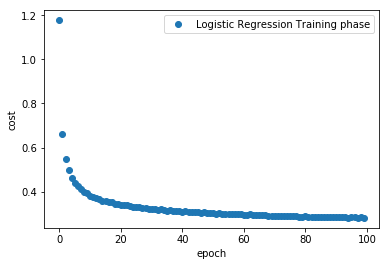

Model accuracy:  0.9223


In [24]:
cost_set = []
epoch_set = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist_images.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist_images.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
            avg_cost +=sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})/total_batch
        #
        epoch_set.append(epoch+1)
        cost_set.append(avg_cost)
        #
        if epoch % display_step==0:
            print("Epoch:", "%04d"%(epoch+1), " Cost: ", "{:.9f}".format(avg_cost))
    print('training phase finished')
    plt.plot(epoch_set, cost_set, 'o', label = 'Logistic Regression Training phase')
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.legend()
    plt.show()
    
    correct_prediction = tf.equal(tf.argmax(activation,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print("Model accuracy: ", accuracy.eval({\
        x:mnist_images.test.images,\
        y:mnist_images.test.labels\
    }))